In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud

In [2]:
df = pd.read_pickle('home_df.pkl')
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0615391206,"[0, 0]",5,My daughter wanted this book and the price on ...,"10 19, 2013",APYOBQE6M18AA,Martin Schwartz,Best Price,1382140800
1,0615391206,"[0, 0]",5,I bought this zoku quick pop for my daughterr ...,"06 18, 2014",A1JVQTAGHYOL7F,Michelle Dinh,zoku,1403049600
2,0615391206,"[26, 27]",4,There is no shortage of pop recipes available ...,"05 5, 2013",A3UPYGJKZ0XTU4,mirasreviews,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000
3,0615391206,"[14, 18]",5,This book is a must have if you get a Zoku (wh...,"08 4, 2011",A2MHCTX43MIMDZ,"M. Johnson ""Tea Lover""",Creative Combos,1312416000
4,0615391206,"[0, 0]",4,This cookbook is great. I have really enjoyed...,"06 7, 2014",AHAI85T5C2DH3,PugLover,A must own if you own the Zoku maker...,1402099200


In [3]:

df['reviewTextLower'] = df.reviewText
df['reviewTextLower'] = df.reviewTextLower.str.lower()


In [4]:
# Convert to matrices of countn and tfidf features
# Ignore words with a frequency higher than .6 from the documents
# Select a max of 4000 features
# 1-gram and 2-grams, English stop words
# tokens by the pattern
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

# 

cv_data = count_vectorizer.fit_transform(df.reviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.reviewTextLower)

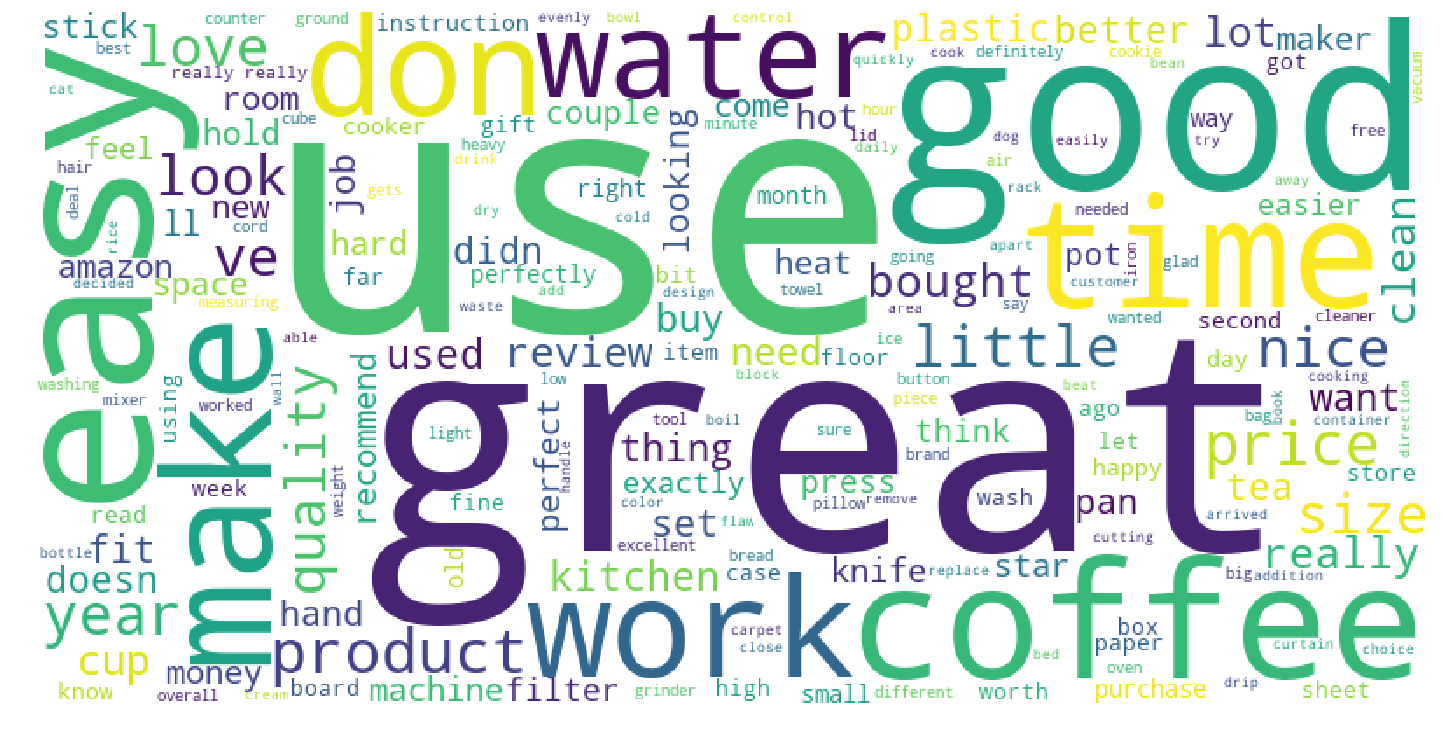

In [5]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

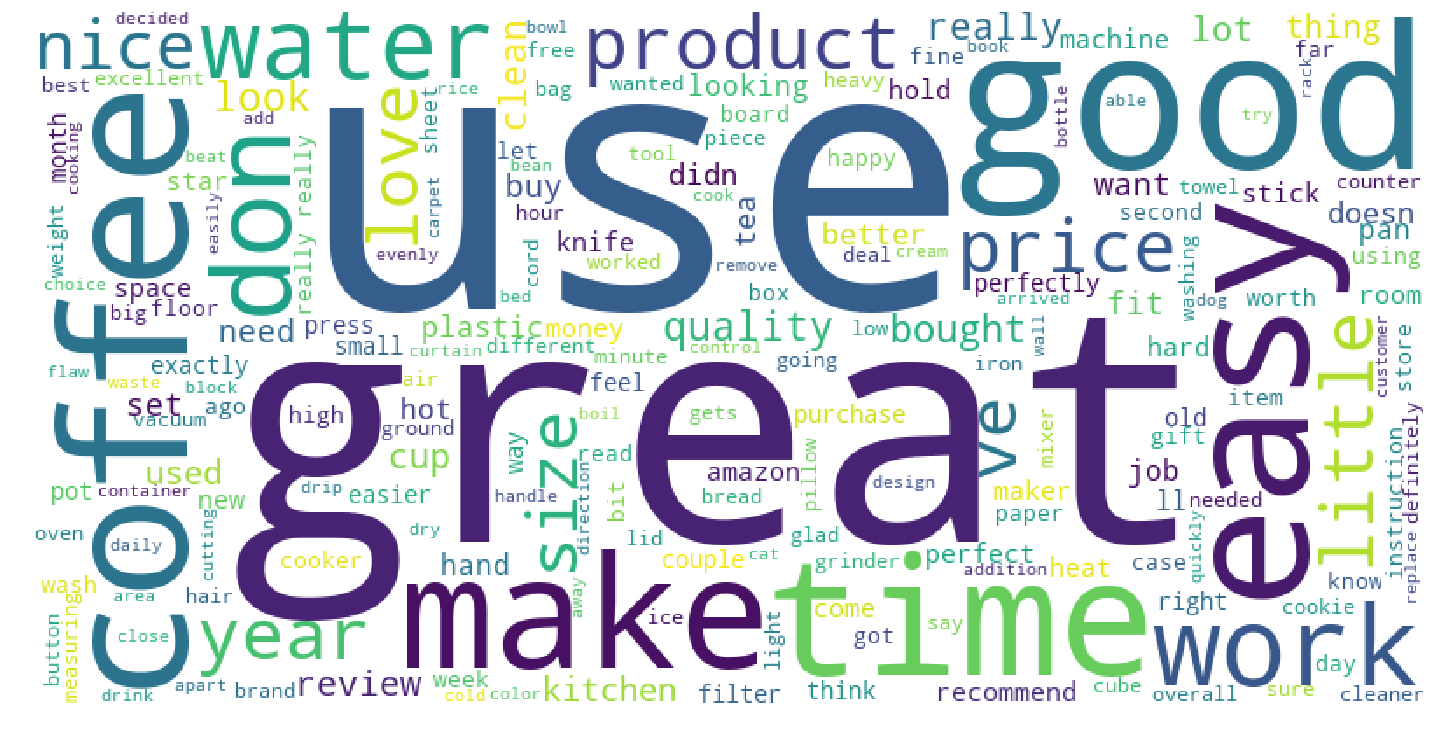

In [8]:
for_wordcloud_tf = tfidf_vectorizer.get_feature_names()
for_wordcloud_tf = for_wordcloud_tf
for_wordcloud_str_tf = ' '.join(for_wordcloud_tf)

wordcloud_tf = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str_tf)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud_tf)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

How do we make a feature wordcloud? 

In [7]:
# Convert to matrices of countn and tfidf features
# Ignore words with a frequency higher than .4 from the documents
# Select a max of 1000 features
# 1-gram and 3-grams, English stop words
# tokens by the pattern
count_vectorizer_l = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.4, max_features=1000)
tfidf_vectorizer_l = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.4, max_features=1000)

# 

cv_data_l = count_vectorizer_l.fit_transform(df.reviewTextLower)
tfidf_data_l = tfidf_vectorizer_l.fit_transform(df.reviewTextLower)

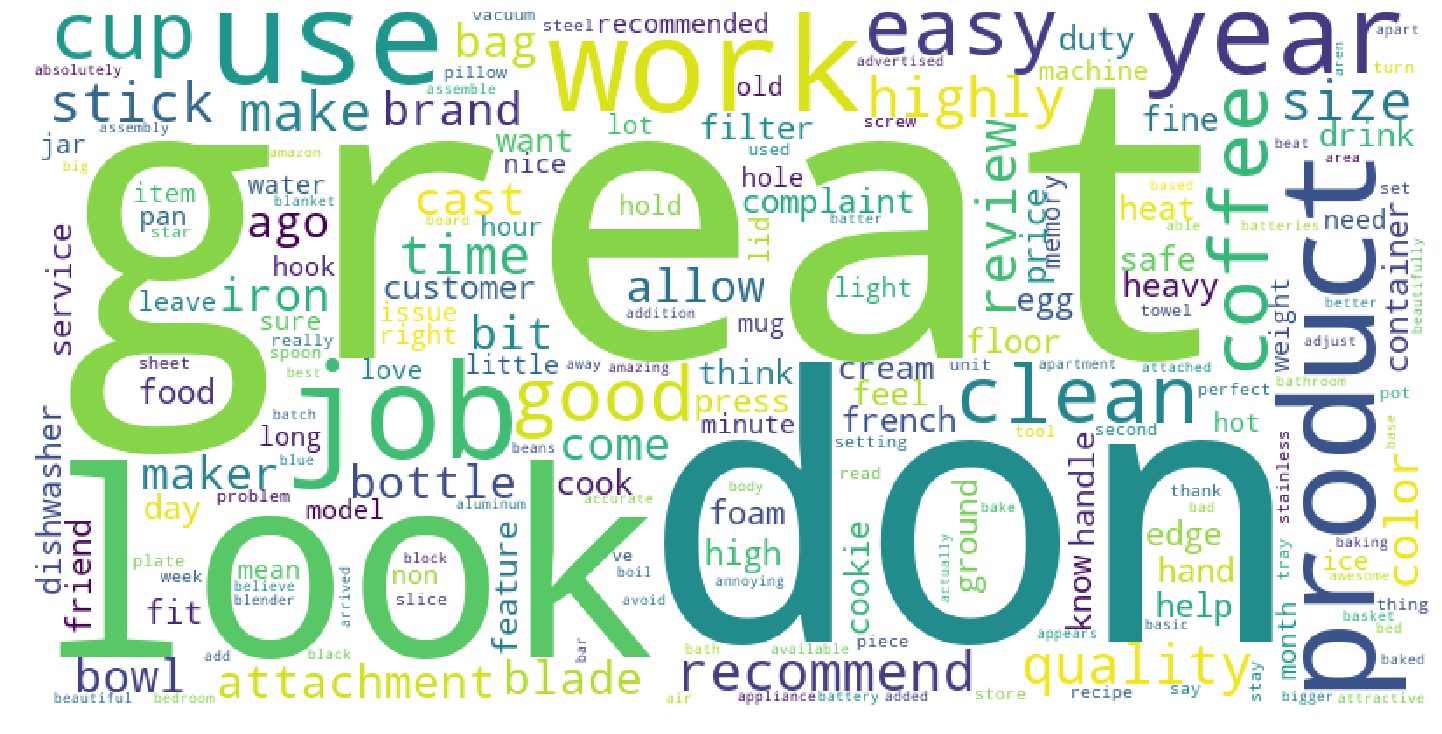

In [9]:
for_wordcloud_tf_l = tfidf_vectorizer_l.get_feature_names()
for_wordcloud_tf_l = for_wordcloud_tf_l
for_wordcloud_str_tf_l = ' '.join(for_wordcloud_tf_l)

wordcloud_tf_l = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str_tf_l)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud_tf_l)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()